# Dos resortes colgantes

[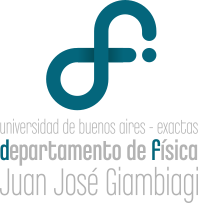](https://www.df.uba.ar/)

[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

# Enunciado
 Considere el sistema de la figura en ausencia de gravedad  
![Figura 1: Sistema a analizar.](figuras/modosNormales_ej1-6.png)
    
a) Obtenga sus frecuencias naturales de oscilación y los modos normales correspondientes.
Escriba las ecuaciones de movimiento de cada masa.  
b) Sabiendo que a $t=0$ el sistema satisface las siguientes condiciones: $\Psi_{a}(0)=1,\,\Psi_{b}(0)=0$ y que se encuentra en reposo, encuentre el movimiento de cada partícula.   
c) Analice cómo se modifica el resultado por la presencia de la gravedad.

# Obtención de frecuencias y modos normales de oscilación

## Potenciales en el sistema
Empezamos preguntandonos que potenciales están en juego.
En este caso los de los resortes.
En la figura está indicada como coordenadas sugeridas las $\psi_i$, notación que se usa para notar un pequeño desplazamiento.
Pero antes de ver el porqué de esta sugerencia hagamos el análisis el potencial elástico de cada resorte que como sabemos depende de la longitud de los mismos.

Tomamos el origen del sistema de coordenadas en el "techo" del que pende el resorte superior, de allí apuntando hacia abajo orientamos $\hat{y}$.
Para el resorte unido a este techo la posición de la masa superior $\vec{y}_a$ determina su longitud
$$
l_1 = |y_a \hat{y} - 0|= y_a .
$$
Para el que pende debajo de esta masa tiene en su otro extremo en $\vec{y}_b$ otra masa.
La posición de ambas establece su longitud
$$
l_2 = |y_b \hat{y} - y_a \hat{y}|= y_b- y_a . 
$$
Si ambos tienen la misma longitud natural $l_0$, aquella que tendrían si ninguna fuerza se aplicara a ellos, el potencial del sistema es
$$
V(y_a, y_b)= \frac{k}{2} \left[ \left(y_a - l_0 \right)^2 + \left(y_b - y_a - l_0 \right)^2 \right].
$$ 

In [1]:
import sympy as sym
from sympy.physics.mechanics import init_vprinting
init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

import warnings
warnings.filterwarnings("ignore")

In [2]:
m, k = sym.symbols('m, k') # parámetros físicos
t = sym.Symbol('t')
l_0 = sym.symbols('l_0')
y_a = sym.Function('y_a')(t)
y_b = sym.Function('y_b')(t)

In [3]:
V = sym.Eq(sym.symbols('V'), (k/2)* ((y_a- l_0)**2 + (y_b- y_a- l_0)**2 ) )
V

## Fuerzas y planteo de 2.a ley de Newton
Para escribir la 2.a ley de Newton para cada masa obtenemos las fuerzas sobre ellas.
Para la superior
$$
m \ddot{y}_a 
= m \ddot{\vec{y}_a} \cdot \hat{y} = -\vec{\nabla}_a V \cdot \hat{y} 
= - \frac{\partial}{\partial y_a} V(y_a, y_b) = - k (y_a- l_0) + k (y_b- y_a- l_0)
= -k (2 y_a- y_b) .
$$

In [4]:
sym.Eq(m* y_a.diff(t,2), -V.rhs.diff(y_a).simplify() )

Para la masa inferior lo mismo
$$
\frac{2m}{3} \ddot{y}_b = \frac{2m}{3} \ddot{\vec{y}_b} \cdot \hat{y} = -\vec{\nabla}_b V \cdot \hat{y} = - \frac{\partial}{\partial y_b} V(y_a, y_b)= - k (y_b -y_a- l_0) .
$$

In [5]:
sym.Eq(sym.Rational(2,3)* m* y_b.diff(t,2), -V.rhs.diff(y_b).simplify() )

En este sistema no afectado por la aceleración $\vec{g}$, resulta que las longitudes de equilibrio de las fuerzas corresponden a cuando la longitud de los resortes coincide con $l_0$, pues ninguna otra fuerza que la elástica existe en este modelo.
Esto es fácilmente comprobable obteniendo el mínimo de potencial en función de las longitudes de los resortes. $l_1$ y $l_2$.
Entonces
$$
y_a = l_o + \psi_a,
$$
siendo $\psi_a$ el pequeño desplazamiento en torno a la posición de equilibrio, y lo mismo para el extremo inferior del segundo resorte.
$$
y_b = 2 l_o + \psi_b.
$$

In [6]:
psi_a = sym.Function('psi_a')(t) # se declaran símbolos a medida que se requieren
psi_b = sym.Function('psi_b')(t)
psis ={
    y_a : l_0 + psi_a,
    y_b : 2* l_0 + psi_b,
}
Vpsi = V.subs(psis)
Vpsi

Si quiere re-escribirse las ecuaciones de la 2.a ley en funcion de estos pequeños desplazamientos al derivar dos veces respecto al tiempo $\ddot{y}_a= \ddot{\psi}_a$ y $\ddot{y}_b = \ddot{\psi}_b$.
Se obtendrá
$$
\begin{aligned}
m \ddot{\psi}_a & = - k \left[ (l_o + \psi_a) - l_0 \right] + k \left[ (2 l_0 + \psi_b) - (l_0 + \psi_a) - l_0 \right] = -k \psi_a + k (\psi_b - \psi_a) = -k (2\psi_a - \psi_b) \\
\frac{2m}{3} \ddot{\psi}_b & = -  k \left( (2 l_o+ \psi_b) - (l_o + \psi_a) - l_0 \right)= -k (\psi_b - \psi_a)
\end{aligned}
$$

In [7]:
sym.Eq(m* y_a.subs(psis).diff(t,2), -Vpsi.rhs.diff(psi_a).simplify() )

In [8]:
sym.Eq(sym.Rational(2,3)* m* y_b.subs(psis).diff(t,2), -Vpsi.rhs.diff(psi_b).simplify() )

Queda un sistema de ecuaciones diferenciales lineales acopladas
$$
\left \{
\begin{matrix}
m \ddot{\psi}_a = - k (2 \psi_a - \psi_b)\\
\frac{2m}{3} \ddot{\psi}_b = -k ( \psi_b - \psi_a)
\end{matrix}
\right .
,
$$
que puede escribirse en forma matricial
$$
\mathbb{M} \ddot{\vec{\Psi}} = -\mathbb{K} \vec{\Psi},
$$
donde operan sobre el vector columna con los desplazamientos y su aceleración


In [9]:
vecPsi = sym.Eq( sym.Function(r'\vec{\Psi}')(t), sym.Matrix([[psi_a], [psi_b] ]) , evaluate= False )
vecPsi, sym.Eq(vecPsi.lhs.diff(t,2), vecPsi.rhs.diff(t,2), evaluate = False)

⎛             ⎡ψₐ ⎤               ⎡ψₐ̈ ⎤⎞
⎜\vec{\Psi} = ⎢   ⎥, \vec{\̈Psi} = ⎢   ⎥⎟
⎝             ⎣ψ_b⎦               ⎣ψ_̈b⎦⎠

la matrices con la información de las masas, \\(\mathbb{M}\\), y los coeficientes de dureza de los resortes, \\(\mathbb{K}\\)

In [10]:
matM = sym.Eq(sym.Symbol('\mathbb{M}'), sym.Matrix([ 
                [1, 0],
                [0,'2/3']
                ] ),
              evaluate= False
             )
matK = sym.Eq(sym.Symbol('\mathbb{K}'), sym.Matrix([ 
                [2, -1],
                [-1,1]
                ] ),
              evaluate= False
             )
matM, matK

⎛             ⎡1   0 ⎤               ⎡2   -1⎤⎞
⎜\mathbb{M} = ⎢      ⎥, \mathbb{K} = ⎢      ⎥⎟
⎝             ⎣0  2/3⎦               ⎣-1  1 ⎦⎠

In [11]:
sym.Eq(sym.MatMul(matM.rhs* m, vecPsi.rhs.diff(t,2) ), sym.MatMul(-1,k* matK.rhs, vecPsi.rhs) )

⎡m   0 ⎤                         
⎢      ⎥ ⎡ψₐ̈ ⎤    ⎡2⋅k  -k⎤ ⎡ψₐ ⎤
⎢   2⋅m⎥⋅⎢   ⎥ = -⎢       ⎥⋅⎢   ⎥
⎢0  ───⎥ ⎣ψ_̈b⎦    ⎣-k   k ⎦ ⎣ψ_b⎦
⎣    3 ⎦                         

Como $\mathbb{M}$ siempre es diagonal es sencillo despejar $\ddot{\vec{\Psi}}$ y llevar a la forma
$$
\ddot{\vec{\Psi}} = - \mathbb{M}^{-1} \mathbb{K} \vec{\Psi} = -\mathbb{K}' \vec{\Psi},
$$
donde

In [12]:
matKPrima= sym.Eq(sym.Symbol("\mathbb{K}'"), (k/m)* matM.rhs.inv()* matK.rhs, evaluate= False )
matKPrima

              ⎡ 2⋅k   -k ⎤
              ⎢ ───   ───⎥
              ⎢  m     m ⎥
\mathbb{K}' = ⎢          ⎥
              ⎢-3⋅k   3⋅k⎥
              ⎢─────  ───⎥
              ⎣ 2⋅m   2⋅m⎦

Queda la expresión sobre la que se operará

In [13]:
sym.Eq(vecPsi.rhs.diff(t,2) , sym.MatMul(-1, matKPrima.rhs, vecPsi.rhs) )

         ⎡ 2⋅k   -k ⎤      
         ⎢ ───   ───⎥      
⎡ψₐ̈ ⎤    ⎢  m     m ⎥ ⎡ψₐ ⎤
⎢   ⎥ = -⎢          ⎥⋅⎢   ⎥
⎣ψ_̈b⎦    ⎢-3⋅k   3⋅k⎥ ⎣ψ_b⎦
         ⎢─────  ───⎥      
         ⎣ 2⋅m   2⋅m⎦      

## Resolución del sistema de ecuaciones diferenciales

Proponiendo la solución $\psi= \psi_0 \mathrm{e}^{i \omega t}$, se llega a que
$$
\ddot{\psi} =  (-i \omega)^2 \psi= - \omega^2 \psi
$$ 
lo que permite escribir el sistema como

In [14]:
omega= sym.Symbol('omega', positive=True)
sym.Eq(sym.MatMul(- omega**2, vecPsi.rhs), sym.MatMul(-1, matKPrima.rhs, vecPsi.rhs))

             ⎡ 2⋅k   -k ⎤      
             ⎢ ───   ───⎥      
  2 ⎡ψₐ ⎤    ⎢  m     m ⎥ ⎡ψₐ ⎤
-ω ⋅⎢   ⎥ = -⎢          ⎥⋅⎢   ⎥
    ⎣ψ_b⎦    ⎢-3⋅k   3⋅k⎥ ⎣ψ_b⎦
             ⎢─────  ───⎥      
             ⎣ 2⋅m   2⋅m⎦      

Esto nos permite agrupar todo a un lado del signo de igualdad

In [15]:
sistema = omega**2* sym.eye(2)- matKPrima.rhs # ¡OJO! Que se resta K prima
sym.Eq(sym.MatMul(sistema, vecPsi.rhs), 0, evaluate= False)

⎡  2⋅k    2      k     ⎤          
⎢- ─── + ω       ─     ⎥          
⎢   m            m     ⎥ ⎡ψₐ ⎤    
⎢                      ⎥⋅⎢   ⎥ = 0
⎢   3⋅k        3⋅k    2⎥ ⎣ψ_b⎦    
⎢   ───      - ─── + ω ⎥          
⎣   2⋅m        2⋅m     ⎦          

Para evitar la solución trivial $\psi_1= \psi_2= 0$ el determinante de la matriz debe ser nulo.
Se obtiene así un polinomio característico correspondiente a la matríz $\mathbb{K}'$ en función de los $\omega^2$ que son los autovalores para esta matríz,

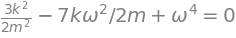

In [16]:
detSistema = sym.det(sistema)
sym.Eq(detSistema, 0, evaluate= False).simplify()

De las raices se obtienen las $\omega$ de los modos normales

In [17]:
frecModos = sym.solve(detSistema,omega)
frecModos

Las $\omega$ negativas no tienen sentido físico, por lo que nos quedamos con las dos correspondientes a este sistema de sendos grados de libertad:

In [18]:
omega_1, omega_2 = sym.symbols('omega_1, omega_2', positive=True)
omega1 = sym.Eq(omega_1, sym.simplify(frecModos[1]) )
omega2 = sym.Eq(omega_2, sym.simplify(frecModos[3]) )
omega1, omega2

Se hace usualmente un ordenamiento de menor a mayor de las frecuencias, pues como se verá luego, una mayor frecuencia está asociada a un movimiento _más violento_.

## Autovalores sin tanto esfuerzo

Por supuesto `sympy` puede calcular los $\omega_i$ sin que deba calcularse el polinomio característico de $\mathbb{K}'$ y obtener sus raices.

In [19]:
omegasCuadrado = (matKPrima.rhs).eigenvals(multiple=True) # múltiple: devuelve lista
omegasCuadrado

In [20]:
sym.Eq(omega_1, sym.sqrt(omegasCuadrado[0]) ), sym.Eq(omega_2, sym.sqrt(omegasCuadrado[1]) )

## Modos normales
Con cada una de las $\omega$ obtenidas da una solución válida al sistema de ecuaciones diferenciales del estilo que obtuvimos para el oscilador de un solo grado de libertad.
Pero con dos grados de libertad habrá que definir la relación de amplitudes entre cada uno de estos, lo que escribiremos como un vector $\vec{\xi}_i$.

### Modo 1
Para $\omega_1$ corresponderá una relación de amplitudes para cada masa

In [21]:
xi1, xi1a, xi1b = sym.physics.mechanics.dynamicsymbols(r'\vec{\xi}_1, xi_1_a, xi_1_b')
vecXi1 = sym.Eq(xi1, sym.Matrix([[xi1a], [xi1b] ] ), evaluate= False )
vecXi1

             ⎡ξ₁ ₐ ⎤
\vec{\xi}₁ = ⎢     ⎥
             ⎣ξ_1_b⎦

y una fase $\phi_1$ en su solucíon general:

In [22]:
phi_1 = sym.Symbol('phi_1')
t = sym.Symbol('t')
soluciónOmega1 = vecXi1.lhs* sym.cos(omega1.lhs* t+ phi_1)
sym.Eq(sym.MatMul(vecPsi.rhs), soluciónOmega1, evaluate=False)

⎡ψₐ ⎤                            
⎢   ⎥ = \vec{\xi}₁⋅cos(ω₁⋅t + φ₁)
⎣ψ_b⎦                            

¿Como obtener este vector $\vec{\xi}_1$?
Si reemplazamos esta solución en

In [23]:
sym.Eq(sym.MatMul(sistema, vecPsi.rhs), 0, evaluate=False)

⎡  2⋅k    2      k     ⎤          
⎢- ─── + ω       ─     ⎥          
⎢   m            m     ⎥ ⎡ψₐ ⎤    
⎢                      ⎥⋅⎢   ⎥ = 0
⎢   3⋅k        3⋅k    2⎥ ⎣ψ_b⎦    
⎢   ───      - ─── + ω ⎥          
⎣   2⋅m        2⋅m     ⎦          

In [24]:
sym.Eq(sym.MatMul(sistema.subs(omega, omega1.lhs), soluciónOmega1 ), 0, evaluate=False)

⎡  2⋅k     2       k     ⎤                              
⎢- ─── + ω₁        ─     ⎥                              
⎢   m              m     ⎥                              
⎢                        ⎥⋅\vec{\xi}₁⋅cos(ω₁⋅t + φ₁) = 0
⎢    3⋅k        3⋅k     2⎥                              
⎢    ───      - ─── + ω₁ ⎥                              
⎣    2⋅m        2⋅m      ⎦                              

Ya que el coseno no debe ser nulo en todo $t$ nos encontramos que reemplazando por el valor de $\omega_1$

In [25]:
sysXi1= sym.Eq(sym.MatMul(sistema.subs(omega, omega1.rhs), vecXi1.rhs ), 0, evaluate=False)
sysXi1

⎡-3⋅k    k ⎤            
⎢─────   ─ ⎥            
⎢ 2⋅m    m ⎥ ⎡ξ₁ ₐ ⎤    
⎢          ⎥⋅⎢     ⎥ = 0
⎢ 3⋅k   -k ⎥ ⎣ξ_1_b⎦    
⎢ ───   ───⎥            
⎣ 2⋅m    m ⎦            

Despejando de la primera o segunda ecuación nos queda idéntica relación, $\xi_{1b}= \frac{3}{2} \xi_{1a}$, por tanto

In [26]:
vecXi1Subs= sym.Eq(vecXi1.lhs, vecXi1.rhs.subs([(xi1a, '2/3'), (xi1b, 1 ) ] ), evaluate= False )
vecXi1Subs

             ⎡2/3⎤
\vec{\xi}₁ = ⎢   ⎥
             ⎣ 1 ⎦

Si el sistema oscilará con $\omega= \omega_1$ ambas masas subirían o bajarían, solo que la de más abajo se distanciaría de su posición de equilibrio 3/2 veces más que la de arriba.

### Modo 2
Seguimos el mismo procedimento para $\omega_2$

In [27]:
xi2, xi2a, xi2b = sym.physics.mechanics.dynamicsymbols(r'\vec{\xi}_2, xi_2_a, xi_2_b')
vecXi2 = sym.Eq(xi2, sym.Matrix([[xi2a], [xi2b] ] ), evaluate= False )
vecXi2

             ⎡ξ₂ ₐ ⎤
\vec{\xi}₂ = ⎢     ⎥
             ⎣ξ_2_b⎦

In [28]:
phi_2 = sym.Symbol('phi_2')
soluciónOmega2 = vecXi2.lhs* sym.cos(omega2.lhs* t+ phi_2)
sym.Eq(sym.MatMul(vecPsi.rhs), soluciónOmega2, evaluate=False)

⎡ψₐ ⎤                            
⎢   ⎥ = \vec{\xi}₂⋅cos(ω₂⋅t + φ₂)
⎣ψ_b⎦                            

In [29]:
sysXi2= sym.Eq(sym.MatMul(sistema.subs(omega, omega2.rhs), vecXi2.rhs ), 0, evaluate=False)
sysXi2

⎡ k    k ⎤            
⎢ ─    ─ ⎥            
⎢ m    m ⎥ ⎡ξ₂ ₐ ⎤    
⎢        ⎥⋅⎢     ⎥ = 0
⎢3⋅k  3⋅k⎥ ⎣ξ_2_b⎦    
⎢───  ───⎥            
⎣2⋅m  2⋅m⎦            

Despejando de la primera o segunda ecuación nos queda idéntica relación, $\xi_{2b}= - \xi_{2a}$, con lo que obtuvimos

In [30]:
vecXi2Subs= sym.Eq(vecXi2.lhs, vecXi2.rhs.subs([(xi2a, -1),(xi2b, 1) ]), evaluate= False )
vecXi2Subs

             ⎡-1⎤
\vec{\xi}₂ = ⎢  ⎥
             ⎣1 ⎦

Si el sistema oscilara con $\omega= \omega_2$ cuando una masa sube la otra baja y visceversa con ídentica separacion de su posición de equilibrio.

## Autovectores
los $\vec{\xi}_1$ son los autovectores asociados a los autovalores $\omega_i^2$ de la matríz $\mathbb{K}'$.
Nuevamente, `sympy` puede obtenerlos con poco sufrimiento para el operador de la computadora. 

In [31]:
autovectores = (matKPrima.rhs).eigenvects()
autovectores

⎡⎛ k      ⎡⎡2/3⎤⎤⎞  ⎛3⋅k     ⎡⎡-1⎤⎤⎞⎤
⎢⎜───, 1, ⎢⎢   ⎥⎥⎟, ⎜───, 1, ⎢⎢  ⎥⎥⎟⎥
⎣⎝2⋅m     ⎣⎣ 1 ⎦⎦⎠  ⎝ m      ⎣⎣1 ⎦⎦⎠⎦

Donde se indica (autovalor, multiplicidad y autovector).
Por tanto

In [32]:
sym.Eq(vecXi1.lhs, autovectores[1][2][0], evaluate= False), sym.Eq(vecXi2.lhs, autovectores[0][2][0], evaluate= False)

⎛             ⎡-1⎤               ⎡2/3⎤⎞
⎜\vec{\xi}₁ = ⎢  ⎥, \vec{\xi}₂ = ⎢   ⎥⎟
⎝             ⎣1 ⎦               ⎣ 1 ⎦⎠

## Solución general
Sabemos que la solución al sistema es la combinación lineal de ambas soluciones es

In [33]:
A_1, A_2 = sym.symbols('A_1, A_2') # símbolos varios
soluciónGeneral= sym.Eq(vecPsi, A_1* soluciónOmega1 + A_2* soluciónOmega2, evaluate= False)
soluciónGeneral

             ⎡ψₐ ⎤                                                            
\vec{\Psi} = ⎢   ⎥ = A₁⋅\vec{\xi}₁⋅cos(ω₁⋅t + φ₁) + A₂⋅\vec{\xi}₂⋅cos(ω₂⋅t + φ
             ⎣ψ_b⎦                                                            

  
₂)
  

con $A_i$ y $\phi_i$ las amplitudes y fases de cada modo que deben responder a las condiciones iniciales.

In [34]:
sustitucionesDinámica = {
    omega1.lhs: omega1.rhs,
    omega2.lhs: omega2.rhs,
    vecXi1.lhs: vecXi1Subs.rhs,
    vecXi2.lhs: vecXi2Subs.rhs
}
dinámica= sym.Eq(vecPsi.rhs, soluciónGeneral.rhs.subs(sustitucionesDinámica), evaluate= False)
dinámica

        ⎡        ⎛              ___⎞                            ⎤
        ⎢        ⎜             ╱ k ⎟                            ⎥
        ⎢        ⎜     √2⋅t⋅  ╱  ─ ⎟                            ⎥
        ⎢        ⎜          ╲╱   m ⎟                            ⎥
        ⎢2⋅A₁⋅cos⎜φ₁ + ────────────⎟         ⎛              ___⎞⎥
        ⎢        ⎝          2      ⎠         ⎜             ╱ k ⎟⎥
⎡ψₐ ⎤   ⎢─────────────────────────── - A₂⋅cos⎜φ₂ + √3⋅t⋅  ╱  ─ ⎟⎥
⎢   ⎥ = ⎢             3                      ⎝          ╲╱   m ⎠⎥
⎣ψ_b⎦   ⎢                                                       ⎥
        ⎢       ⎛              ___⎞                             ⎥
        ⎢       ⎜             ╱ k ⎟                             ⎥
        ⎢       ⎜     √2⋅t⋅  ╱  ─ ⎟         ⎛              ___⎞ ⎥
        ⎢       ⎜          ╲╱   m ⎟         ⎜             ╱ k ⎟ ⎥
        ⎢ A₁⋅cos⎜φ₁ + ────────────⎟ + A₂⋅cos⎜φ₂ + √3⋅t⋅  ╱  ─ ⎟ ⎥
        ⎣       ⎝          2      ⎠         ⎝          ╲╱   m ⎠ ⎦

# Condiciones iniciales
Segun el enunciado en $t=0$

In [35]:
dinámica.subs(t,0)

           ⎡2⋅A₁⋅cos(φ₁)             ⎤
⎡ψₐ(0) ⎤   ⎢──────────── - A₂⋅cos(φ₂)⎥
⎢      ⎥ = ⎢     3                   ⎥
⎣ψ_b(0)⎦   ⎢                         ⎥
           ⎣ A₁⋅cos(φ₁) + A₂⋅cos(φ₂) ⎦

se sabe que las posiciones son

In [36]:
condicionesPosición = {
    dinámica.lhs[0].subs(t,0): 1,
    dinámica.lhs[1].subs(t,0): 0,
}
condicionesPosición

Pero aún tras esta substitución el número de incógnitas dobla el de ecuaciones.

In [37]:
dinámicaCondiciónPosición = dinámica.subs(t,0).subs(condicionesPosición)
dinámicaCondiciónPosición

      ⎡2⋅A₁⋅cos(φ₁)             ⎤
⎡1⎤   ⎢──────────── - A₂⋅cos(φ₂)⎥
⎢ ⎥ = ⎢     3                   ⎥
⎣0⎦   ⎢                         ⎥
      ⎣ A₁⋅cos(φ₁) + A₂⋅cos(φ₂) ⎦

El enunciado da otra información al afirmar que el sistema "se encuentra originalmente en reposo".
Esto significa que las velocidades inciales son nulas

In [38]:
condicionesVelocidad = {
    dinámica.lhs[0].diff().subs(t,0): 0,
    dinámica.lhs[1].diff().subs(t,0): 0,
}
condicionesVelocidad

⎧(ψₐ̇)│   : 0, (ψ_̇b)│   : 0⎫
⎨    │t=0          │t=0   ⎬
⎩                         ⎭

In [39]:
sym.Eq( sym.Matrix([[0], [0] ] ), dinámica.rhs.diff(t).subs(t, 0) )

      ⎡            ___                                ⎤
      ⎢           ╱ k                                 ⎥
      ⎢  √2⋅A₁⋅  ╱  ─ ⋅sin(φ₁)             ___        ⎥
      ⎢        ╲╱   m                     ╱ k         ⎥
      ⎢- ───────────────────── + √3⋅A₂⋅  ╱  ─ ⋅sin(φ₂)⎥
⎡0⎤   ⎢            3                   ╲╱   m         ⎥
⎢ ⎥ = ⎢                                               ⎥
⎣0⎦   ⎢            ___                                ⎥
      ⎢           ╱ k                                 ⎥
      ⎢  √2⋅A₁⋅  ╱  ─ ⋅sin(φ₁)             ___        ⎥
      ⎢        ╲╱   m                     ╱ k         ⎥
      ⎢- ───────────────────── - √3⋅A₂⋅  ╱  ─ ⋅sin(φ₂)⎥
      ⎣            2                   ╲╱   m         ⎦

Pero hay un camino más sencillo que resolver un sistema que contemple estas dos ecuaciones de la condición para la velocidad y las otras tantas para la condición de la posición.

De establecerse $\phi_1= \phi_2= 0$ esto asegura que las velocidades son nulas pues estas fases son argumento de los senos en todos los términos.
Volviendo entonces a las condiciones sobre la posición con este dato.

In [40]:
amplitudesSistema= dinámicaCondiciónPosición.subs([(phi_1, 0), (phi_2, 0) ] )
amplitudesSistema

      ⎡2⋅A₁     ⎤
⎡1⎤   ⎢──── - A₂⎥
⎢ ⎥ = ⎢ 3       ⎥
⎣0⎦   ⎢         ⎥
      ⎣ A₁ + A₂ ⎦

No es difícil obtener que $A_1= \frac{3}{5}$ y $A_2= -\frac{3}{5}$.
Con lo que finalmente obtenemos una solución para estas condiciones iniciales:

In [41]:
coeficientesCondicionesIniciales = {
    A_1: '3/5',
    A_2: '-3/5',  
    phi_1: 0,
    phi_2: 0,
}
dinámicaCondicionesIniciales = dinámica.subs(coeficientesCondicionesIniciales)
dinámicaCondicionesIniciales

        ⎡     ⎛         ___⎞                      ⎤
        ⎢     ⎜        ╱ k ⎟                      ⎥
        ⎢     ⎜√2⋅t⋅  ╱  ─ ⎟        ⎛         ___⎞⎥
        ⎢     ⎜     ╲╱   m ⎟        ⎜        ╱ k ⎟⎥
        ⎢2⋅cos⎜────────────⎟   3⋅cos⎜√3⋅t⋅  ╱  ─ ⎟⎥
        ⎢     ⎝     2      ⎠        ⎝     ╲╱   m ⎠⎥
        ⎢─────────────────── + ───────────────────⎥
⎡ψₐ ⎤   ⎢         5                     5         ⎥
⎢   ⎥ = ⎢                                         ⎥
⎣ψ_b⎦   ⎢     ⎛         ___⎞                      ⎥
        ⎢     ⎜        ╱ k ⎟                      ⎥
        ⎢     ⎜√2⋅t⋅  ╱  ─ ⎟        ⎛         ___⎞⎥
        ⎢     ⎜     ╲╱   m ⎟        ⎜        ╱ k ⎟⎥
        ⎢3⋅cos⎜────────────⎟   3⋅cos⎜√3⋅t⋅  ╱  ─ ⎟⎥
        ⎢     ⎝     2      ⎠        ⎝     ╲╱   m ⎠⎥
        ⎢─────────────────── - ───────────────────⎥
        ⎣         5                     5         ⎦

## Graficación de la dinámica

Resulta útil que las funciones simbólica de `sympy` puedan ser convertidas en otras estríctamente numéricas compatibles con otras funciones básicas de `Python` o de la biblioteca numérica `numpy`.

Para esto se usa el comando `lambdify` que retorna la función en un formato compatible con el módulo de Python indicado.
Por defecto este módulo es el `numpy` que es la que usaremos a continuación.
Obligatoriamente hay que indicar al menos una variable de la que depende la función.
En este caso se indicó $t$, que se indicó en el momento de definir que las \\(\Psi_i = \Psi_i(t)\\).  

In [42]:
k_magnitud = 100 # [N m-1]
m_magnitud = 1 # [kg]
parámetrosFísicos ={
    k : k_magnitud,
    m : m_magnitud,
}

psiA_numpy = sym.lambdify(t, dinámicaCondicionesIniciales.rhs[0].subs(parámetrosFísicos) )
psiB_numpy = sym.lambdify(t, dinámicaCondicionesIniciales.rhs[1].subs(parámetrosFísicos) )

In [43]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight') #estilo
import matplotlib as mpl
mpl.style.use('fivethirtyeight') # estilo de gráficos con grilla y letras grandes


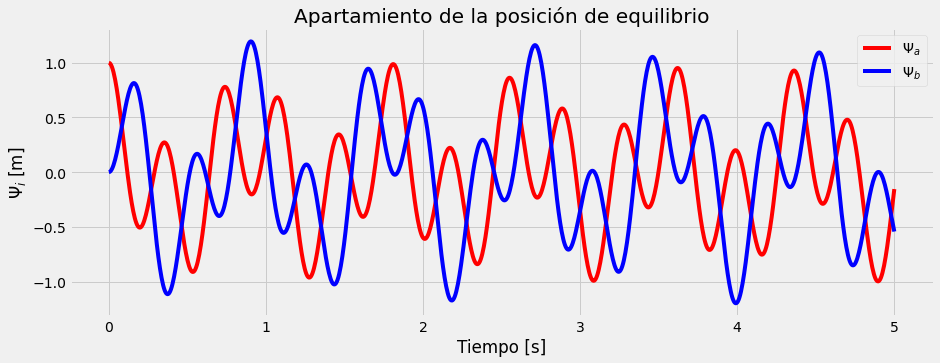

In [44]:
tiempos = np.linspace(0, 5, 1000) # [s]
fig = plt.figure(figsize=(12, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(tiempos, psiA_numpy(tiempos), 'r-', label= '$\Psi_a$')
ax.plot(tiempos, psiB_numpy(tiempos), 'b-', label= '$\Psi_b$' )
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('$\Psi_i$ [m]')
ax.set_title('Apartamiento de la posición de equilibrio')
ax.legend()

Esta complejísima dinámica es fruto de que la condición inicial hizo que $\vec{A}$ no corresponda con la de uno de los modos normales y lo que vemos es una superposición de estos.

## Visualizando los modos normales
Adaptación del notebook de María Luz Martínez Ricci, teórica de Depine, 2.o cuat. 2020  

### Modo 1

In [45]:
sym.Eq(sym.MatMul(vecPsi.rhs), soluciónOmega1, evaluate=False)

⎡ψₐ ⎤                            
⎢   ⎥ = \vec{\xi}₁⋅cos(ω₁⋅t + φ₁)
⎣ψ_b⎦                            

In [46]:
modo1auto={
    vecXi1.lhs: autovectores[0][2][0],
    omega1.lhs : omega1.rhs,
    phi_1 : 0,
}
modo1auto

⎧           ___                          ⎫
⎪          ╱ k                           ⎪
⎪    √2⋅  ╱  ─                           ⎪
⎨       ╲╱   m                      ⎡2/3⎤⎬
⎪ω₁: ──────────, φ₁: 0, \vec{\xi}₁: ⎢   ⎥⎪
⎪        2                          ⎣ 1 ⎦⎪
⎩                                        ⎭

In [47]:
modo1 = sym.Eq(sym.MatMul(vecPsi.rhs), soluciónOmega1.subs(modo1auto).subs(parámetrosFísicos), evaluate=False)
modo1

        ⎡2⋅cos(5⋅√2⋅t)⎤
⎡ψₐ ⎤   ⎢─────────────⎥
⎢   ⎥ = ⎢      3      ⎥
⎣ψ_b⎦   ⎢             ⎥
        ⎣ cos(5⋅√2⋅t) ⎦

In [48]:
psiA_modo1_numpy = sym.lambdify(t, modo1.rhs[0])
psiB_modo1_numpy = sym.lambdify(t, modo1.rhs[1])

In [49]:
from matplotlib import animation, rc
from IPython.display import HTML
# rc('animation', html='html5')
rc('animation', html='jshtml')

In [50]:
l0 = 3 # [m] longitud natural de los resortes 
figuraAnimación, ax = plt.subplots()
# figuraAnimación = plt.figure()
# ax = figuraAnimación.add_axes([0,0,1,1]) # agrega ejes como atributo de la figura
ax.set_ylabel('y [t]' )
ax.set_xlim((-1,1))
ax.set_ylim((-9,1))
ax.grid(True)
ax.plot((-1.5,1.5), [-l0,-l0],  '--',color  = 'green') # linea horizontal
ax.plot((-1.5,1.5), [-2*l0,-2*l0], '--',color  = 'green')
ax.text(1,-3.02,'$l_0$',color = 'green')
ax.text(1,-6.02,'$2 l_0$',color = 'green')
plt.close()

In [51]:
linea, = ax.plot([],[],'o',ms = 10,color = 'r', label = 'Movimiento particula a',zorder = 3)
lineResa, = ax.plot([],[],ls = '--',color = 'r', lw = 2, zorder = 2)
lineb, = ax.plot([],[],'o',ms = 10,color = 'b', label = 'Movimiento particula b',zorder = 3)
lineResb, = ax.plot([],[],ls = '--',color = 'b', lw = 2, zorder = 1)

tiempos= np.linspace(0, 10, 100)
y_a_modo1= psiA_modo1_numpy(tiempos) + l0
y_b_modo1= psiB_modo1_numpy(tiempos) + 2* l0

def actualiza(i):
    linea.set_data(0, -y_a_modo1[i])
    lineResa.set_data([0,0],[0, -y_a_modo1[i]]) # linea desde el origen
    lineb.set_data(0, -y_b_modo1[i])
    lineResb.set_data([0,0],[0, -y_b_modo1[i]])

anim_modo1 = animation.FuncAnimation(figuraAnimación, actualiza, frames= len(tiempos), interval= 200)

In [52]:
anim_modo1

### Modo 2

In [53]:
modo2auto={
    vecXi2.lhs: autovectores[1][2][0],
    omega2.lhs : omega2.rhs,
    phi_2 : 0,
}
modo2auto

⎧           ___                         ⎫
⎪          ╱ k                      ⎡-1⎤⎪
⎨ω₂: √3⋅  ╱  ─ , φ₂: 0, \vec{\xi}₂: ⎢  ⎥⎬
⎪       ╲╱   m                      ⎣1 ⎦⎪
⎩                                       ⎭

In [54]:
modo2 = sym.Eq(sym.MatMul(vecPsi.rhs), soluciónOmega2.subs(modo2auto).subs(parámetrosFísicos), evaluate=False)
modo2

⎡ψₐ ⎤   ⎡-cos(10⋅√3⋅t)⎤
⎢   ⎥ = ⎢             ⎥
⎣ψ_b⎦   ⎣cos(10⋅√3⋅t) ⎦

In [55]:
l0 = 3 # [m] longitud natural de los resortes 
figuraAnimación, ax = plt.subplots()
# figuraAnimación = plt.figure()
# ax = figuraAnimación.add_axes([0,0,1,1]) # agrega ejes como atributo de la figura
ax.set_ylabel('y [t]' )
ax.set_xlim((-1,1))
ax.set_ylim((-9,1))
ax.grid(True)
ax.plot((-1.5,1.5), [-l0,-l0],  '--',color  = 'green') # linea horizontal
ax.plot((-1.5,1.5), [-2*l0,-2*l0], '--',color  = 'green')
ax.text(1,-3.02,'$l_0$',color = 'green')
ax.text(1,-6.02,'$2 l_0$',color = 'green')
plt.close()

In [56]:
psiA_modo2_numpy = sym.lambdify(t, modo2.rhs[0])
psiB_modo2_numpy = sym.lambdify(t, modo2.rhs[1])

In [57]:
linea, = ax.plot([],[],'o',ms = 10,color = 'r', label = 'Movimiento particula a',zorder = 3)
lineResa, = ax.plot([],[],ls = '--',color = 'r', lw = 2, zorder = 2)
lineb, = ax.plot([],[],'o',ms = 10,color = 'b', label = 'Movimiento particula b',zorder = 3)
lineResb, = ax.plot([],[],ls = '--',color = 'b', lw = 2, zorder = 1)

tiempos= np.linspace(0, 10, 100)
y_a_modo2= psiA_modo2_numpy(tiempos) + l0
y_b_modo2= psiB_modo2_numpy(tiempos) + 2* l0

def actualiza(i):
    linea.set_data(0, -y_a_modo2[i])
    lineResa.set_data([0,0],[0, -y_a_modo2[i]]) # linea desde el origen
    lineb.set_data(0, -y_b_modo2[i])
    lineResb.set_data([0,0],[0, -y_b_modo2[i]])

anim_modo2 = animation.FuncAnimation(figuraAnimación, actualiza, frames= len(tiempos), interval= 200)

In [58]:
anim_modo2

**¡NOTESÉ!** Hay una clara diferencia en la velocidad de este modo pues $\omega_2 > \omega_1$.

# ¿Qué modifica la presencia de gravedad?
Sin tratar de ser perspicaces empecemos a resolver "mecánicamente".
Al potencial anteriormente calculado agregamos el potencial gravitatorio
$$
V(y_a, y_b)= \frac{k}{2} \left[ \left(y_a - l_0 \right)^2 + \left(y_b - y_a - l_0 \right)^2 \right]- g( m_a y_a + m_b y_b) .
$$ 

Habrá nuevas posiciones de equilibrio.
Basta realizar $\frac{\partial}{\partial y_i} V = 0$ 
$$
\left\{
\begin{aligned}
k(y_a - l_0)- k (y_b - y_a - l_0)- g m_a =  2 k y_a - k y_b - g m_a &= 0 \\
k(y_b - y_a - l_0) - g m_b &= 0
\end{aligned}
\right.
$$
de donde puede obtenerse fácilmente las posiciones de equilibrio $y_{a0}= \frac{g}{k} (m_a + m_b) + l_0$ e $y_{b0}= \frac{g}{k} (m_a + 2 m_b) + 2 l_0$.

Bien, tenemos nuevas posiciones de equilibrio, y entonces para escribir en función de los apartamientos de estas $\psi_a$ y $\psi_b$ tenemos  
$$
\begin{aligned}
y_a &= y_{a0}+ \psi_a = \frac{g}{k} (m_a + m_b) + l_0 + \psi_a \\
y_b &= y_{b0}+ \psi_a = \frac{g}{k} (m_a + 2 m_b) + 2 l_0 + \psi_b,
\end{aligned}
$$

¿Qué seguía? Para obtener las fuerzas derivar el potencial potencial... ¡pero si lo acabamos de hacer!
Si reemplazo estos $y_a$ y $y_b$
$$
\left\{
\begin{aligned}
m_a \ddot{\psi}_a 
& = 2 k \left[ \frac{g}{k} (m_a + m_b) + l_0 + \psi_a \right] - k \left[ \frac{g}{k} (m_a + 2 m_b) + 2 l_0 + \psi_b \right] - g m_a \\
& = 2 g (m_a+ m_b) + 2k l_0 + 2 k \psi_a - g (m_a + 2 m_b) - 2 k l_0 - k \psi_b - g m_a \\
& = -k (2\psi_a - \psi_b) \\
m_b \ddot{\psi}_b 
& = k \left[ \left( \frac{g}{k} (m_a + 2 m_b) + 2 l_0 + \psi_b \right) - \left( \frac{g}{k} (m_a + m_b) + l_0 + \psi_a \right) - l_0 \right] - g m_b \\
& = g (m_a + 2 m_b) + 2 k l_0 + k \psi_b - g (m_a + m_b) + k l_0 + k \psi_a - kl_0 - g m_b \\
& = -k (\psi_b - \psi_a)
\end{aligned}
\right.
$$

Exactamente lo que teníamos para el caso sin gravedad.
¿Qué es lo que cambia?
No hay que olvidar de que si se quiere expresar las posiciones no desde el equilibrio sino como $y_i$ hay que sumar la posición de equilibrio, que ahora es mayor en módulo que las de los resortes libres, $l_0$ y $2l_0$ respectivamente.

Siendo perspicaces tendríamos que haber recordado que nada de lo que obtuvimos, en particular las frecuencias de oscilación, tenían dependencia en las longitudes de los resortes, si de $k$ y las $m$. 